<a href="https://colab.research.google.com/github/TheDon57/MODS_Exercises/blob/main/Week_5_exercise/LM_Week_05_Gradeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Introduction

In this week we will get a closer look to the possibilities of **linear regression** and methods to improve the performance of the model. We want to predict the Math-grade (G1) that a student at a Portuguese school will achieve under the existing observations.

In this data set originally 33 different features were collected. We will only use a subset of the features to perform our analysis today.

- **school** (GP - Gabriel Pereira, MS - Moisinho da Silveira)

- **sex** (M (Male) or F (Female))

- **age** (From 15 to 22)

- **Medu** (Education of Mother,0 (none), 1 (4th grade), 2 (5th to 9th grade), 3 (secondary education), 4 (higher education))

- **Fedu** (Education of Father,0 (none), 1 (4th grade), 2 (5th to 9th grade), 3 (secondary education), 4 (higher education))

- **Mjob** (Job of Mother, 5 different values: teacher, health, services, at_home, other)

- **Fjob** (Job of Father, 5 different values: teacher, health, services, at_home, other)

- **reason** (reason chosen this school, home, reputation, course or other)

- **studytime** (weekly studytime, 1 - 10 hours)

- **failures** (number of past class failures, 0 to 4)

- **goout** (go out with friends, 1 (very low) to 5 (very high)

- **G1** (first period grade, from 0 to 20)

<p><a href="http://www3.dsi.uminho.pt/pcortez"><strong>Source: Paulo Cortez, University of Minho, Guimaraes, Portugal</strong></a></p>

<https://www.kaggle.com/dipam7/student-grade-prediction?select=student-mat.csv>

## Data Preperation

### Numerical and categorical data

In [1]:
# Imports
import numpy as np
import random

from sklearn.metrics import root_mean_squared_error
from statsmodels.formula.api import ols

# Seed
np.random.seed(42)  # Set seed for NumPy
random.seed(42) # Set seed for random module

In the cell below, we load the data and select a subset of it. Additionally we select the numerical parameters of the dataframe.

`iloc[:, 0:11]` is used to select data by the position. The first part before the comma selects the specified rows and the second part after it selects the columns. Here we want to select all rows so we can just use the colon. For the columns we want to select the first 11 columns starting by 0 and stopping after 10 which is done by 0:11.

`loc[: , ["column_name1", "column_name2"]]` works similar to `iloc` but uses names to select rows and columns.

Run the code below.

In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/mathgrades.csv")
data.head()

,age,Medu,Fedu,school,sex,failures,studytime,goout,Mjob,Fjob,G1
0,18,4,4,GP,F,0,2,4,at_home,teacher,5
1,17,1,1,GP,F,0,2,3,at_home,other,5
2,15,1,1,GP,F,3,2,2,at_home,other,7
3,15,4,2,GP,F,0,3,2,health,services,15
4,16,3,3,GP,F,0,2,2,other,other,6


In [3]:
# Creating subset of data
data = data.iloc[:, 0:11]
print(data.head())

# Selecting data
numerical_data = data.loc[:, ["age", "Medu", "Fedu", "studytime", "failures", "goout", "G1"]]


   age  Medu  Fedu school sex  failures  studytime  goout     Mjob      Fjob  \
0   18     4     4     GP   F         0          2      4  at_home   teacher   
1   17     1     1     GP   F         0          2      3  at_home     other   
2   15     1     1     GP   F         3          2      2  at_home     other   
3   15     4     2     GP   F         0          3      2   health  services   
4   16     3     3     GP   F         0          2      2    other     other   

   G1  
0   5  
1   5  
2   7  
3  15  
4   6  


### Create training and test sets

Create the usual train-test split (80:20).

Run the code below.

In [4]:
from sklearn.model_selection import train_test_split
data_training, data_test = train_test_split(data, test_size=0.2, random_state=42)

### Baseline Model

Let us create a simple baseline for predicting the math grades by using just the variable studytime. Use the package `statsmodels.formula.api` and the function `summary()` to report the results. Validate the performance on the test set by using the RMSE.

Fill in the code below.

In [6]:
# Enter your code here
from statsmodels.formula.api import ols

model_01 = ols(formula="G1 ~ studytime", data=data_training)
model_01 = model_01.fit()

print(model_01.summary(slim=True))

data_test["predictions"] = model_01.predict(data_test)
rmse = root_mean_squared_error(data_test["G1"], data_test["predictions"])
print(f'RSME: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
No. Observations:                 316   F-statistic:                     13.49
Covariance Type:            nonrobust   Prob (F-statistic):           0.000282
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3349      0.470     19.861      0.000       8.410      10.260
studytime      0.7808      0.213      3.673      0.000       0.363       1.199

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
RSME: 3.7474122151268556


### Simple Linear Regression Model

In contrast to the baseline model, create a simple linear regression with the variable age for predicting the math grades. Use the package `statsmodels.formula.api` and the function `summary()` to report the results. Validate the performance on the test set by using the RMSE.

Fill in the code below.

In [7]:
# Enter your code here
from statsmodels.formula.api import ols

model_02 = ols(formula="G1 ~ age", data=data_training)
model_02 = model_02.fit()

print(model_02.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
No. Observations:                 316   F-statistic:                    0.2511
Covariance Type:            nonrobust   Prob (F-statistic):              0.617
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1322      2.399      5.057      0.000       7.412      16.852
age           -0.0716      0.143     -0.501      0.617      -0.353       0.209

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


## Non-linear transformations

Non-linear transformations are a very powerful method to increase our model/'s performance and fit to the data, since it is unrealistic to expect linear relations in most of real-world problems. This kind of transformations are done by using so called interaction terms and quadratic or logarithmic or exponential transformations of the data.

Before we continue with the modeling let's take a closer look at the correlation of the features. What do you notice?

<Axes: >

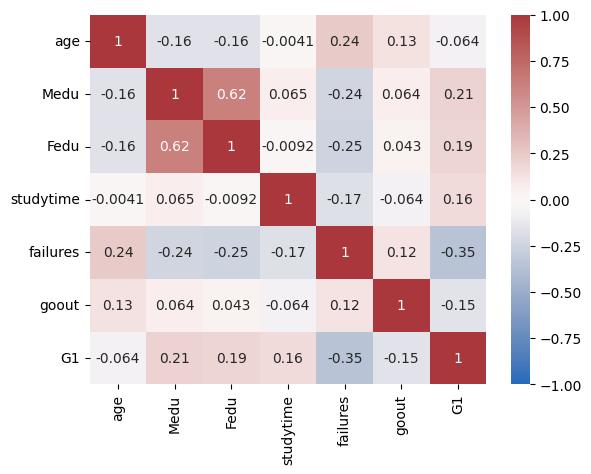

In [8]:
import seaborn as sns
correlations = data[["age", "Medu", "Fedu", "studytime", "failures", "goout", "G1"]].corr(method="pearson")
sns.heatmap(correlations, cmap="vlag", vmin=-1, vmax=1, annot=True)

The correlation plot might help you to solve the next exercises.

### Extending the model I

Extend the baseline model with the variable age and an interaction term with age and studytime. Report the regression results. Validate the performance on the test set by using the RMSE.

Run the code below.

In [9]:
# Enter your code here!
from statsmodels.formula.api import ols

model_03 = ols(formula="G1 ~ studytime + age + age:studytime", data=data_training)
model_03 = model_03.fit()

print(model_03.summary(slim=True))

data_test["predictions"] = model_03.predict(data_test)
rmse = root_mean_squared_error(data_test["G1"], data_test["predictions"])
print(f'RSME: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.055
No. Observations:                 316   F-statistic:                     7.163
Covariance Type:            nonrobust   Prob (F-statistic):           0.000115
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.8664      5.698      4.364      0.000      13.655      36.078
studytime        -6.1936      2.584     -2.397      0.017     -11.277      -1.110
age              -0.9344      0.342     -2.735      0.007      -1.607      -0.262
age:studytime     0.4194      0.155      2.710      0.007       0.115       0.724

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

## Non-Linear Transformations II

### Extending the model II

Extend the baseline model with the variable age, an quadratic transformation of age, the variable goout, and an interaction effect between studytime and goout. Report the regression results. Validate the performance on the test set by using the RMSE.

In [11]:
# Enter your code here!
from statsmodels.formula.api import ols

model_04 = ols(formula="G1 ~ studytime + age + I(age ** 2) + goout + studytime:goout", data=data_training)
model_04 = model_04.fit()

print(model_04.summary(slim=True))

data_test["predictions"] = model_04.predict(data_test)
rmse = root_mean_squared_error(data_test["G1"], data_test["predictions"])
print(f'RSME: {rmse}')

                            OLS Regression Results                            
Dep. Variable:                     G1   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.041
No. Observations:                 316   F-statistic:                     3.685
Covariance Type:            nonrobust   Prob (F-statistic):            0.00296
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5429     23.468      0.023      0.982     -45.634      46.720
studytime           0.8007      0.613      1.305      0.193      -0.406       2.008
age                 1.2172      2.741      0.444      0.657      -4.176       6.610
I(age ** 2)        -0.0375      0.080     -0.467      0.641      -0.195       0.120
goout              -0.2932      0.399     -0.734      0.463      -1.079       0.493
studytime:goout  

## Summary

You can use the summary section to try out other combinations of variables and data. The splitted data can be found in the variables data_training and data_test.

In [ ]:
# Enter your code here!